In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd

# 나눔고딕 경로 찾기 (macOS 기준)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트와 마이너스 기호 깨짐 방지 설정
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 1. Decision Tree Regression 실습

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# 회구, 분류 변수명
# X_reg, y_reg
# X_clf, y_clf

X_reg, y_reg = fetch_california_housing(return_X_y=True)

In [3]:
# 위 코드 판다스로 ㅣ정해서 불러옴
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
x_reg = df.values
y_reg = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [6]:
dt_reg = DecisionTreeRegressor() # max_depth=9
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
# 0에 가까울 수록 좋음


MSE:  0.5311382850333495


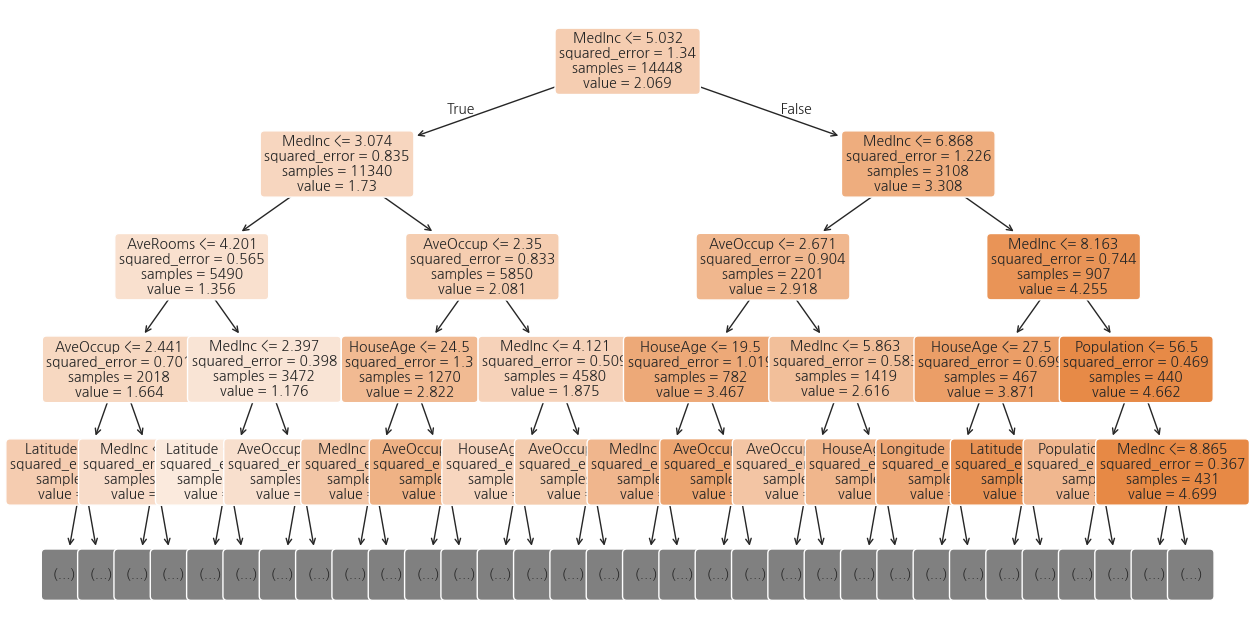

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
# max_depth 시각화해서 보여주는걸 2개만 보여주겠다. 모델자체는 더 깊음

plt.title("Decision Tree Regression")
plot_tree(dt_reg, max_depth=4, filled=True, rounded=True, fontsize=10, feature_names=data.feature_names)

plt.show()

# DT Clf 실습

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# 변수명 추출
feature_names_clf = iris.feature_names
class_names_clf = iris.target_names

5


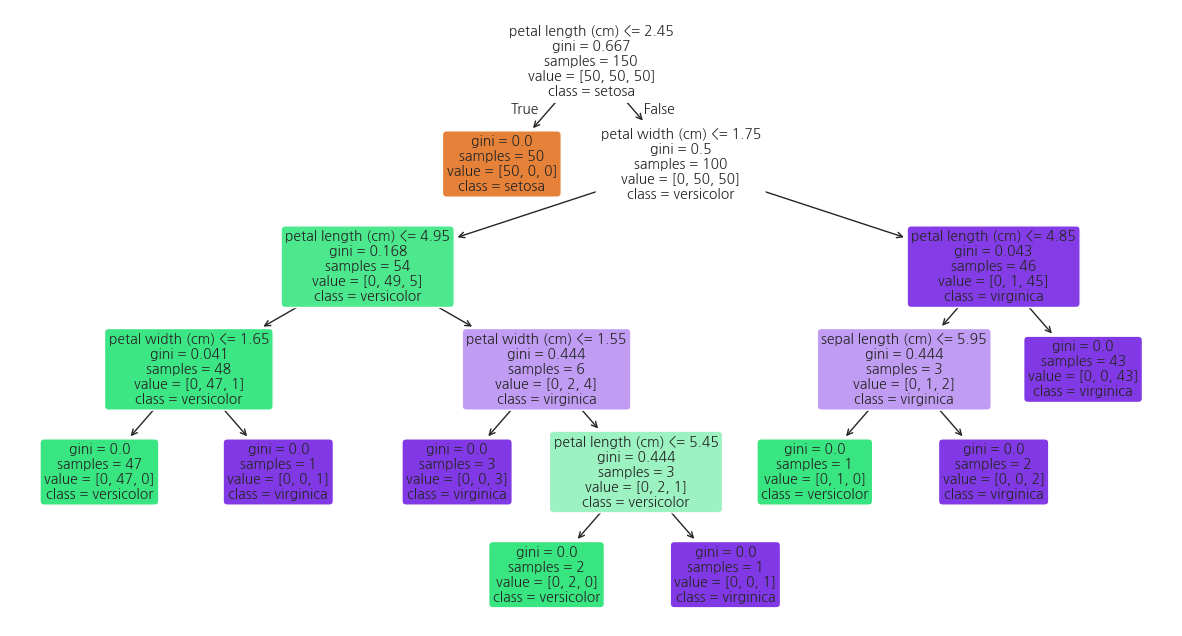

In [14]:
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_clf.fit(X_clf, y_clf)
# 깊이 알 수 잇음
print(dt_clf.get_depth())

plt.figure(figsize=(15, 8))
plt.title("Decision Tree Classifier")
plot_tree(dt_clf, max_depth=6,feature_names=feature_names_clf, class_names=class_names_clf, filled=True, rounded=True, fontsize=10)
plt.show()

# 속성 중요도, 클 수록 중요함, 각 변수(특징)가 예측/분류에 기여한 정도를 수치로

In [15]:
# 특성 이름 가져오기
feature_names = iris.feature_names
importances = dt_clf.feature_importances_
importance_df = pd.DataFrame(importances,index=feature_names)
importance_df

,0
sepal length (cm),0.013333
sepal width (cm),0.000000
petal length (cm),0.564056
petal width (cm),0.422611


# 4. 사전 가지치기 실습
- 사후는 ccp_alpha

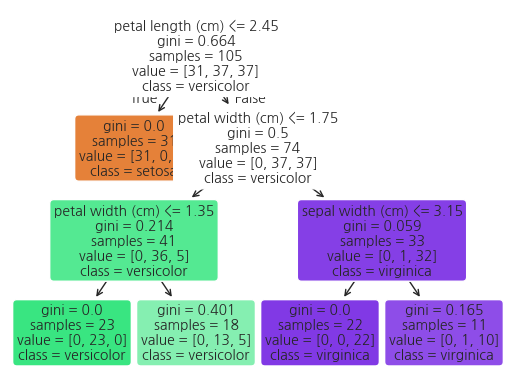

In [16]:
from sklearn.datasets import load_iris
# 최소 10개의 샘플
# 맥트 피처 - 그 노드에서 고려해야할 최대의 개수
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

dt_model_2 = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')
dt_model_2.fit(X_train, y_train)

y_pred = dt_model_2.predict(X_test)


plot_tree(dt_model_2, max_depth=6,feature_names=feature_names_clf, class_names=class_names_clf, filled=True, rounded=True, fontsize=10)

plt.show()

# 포레스트

In [17]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

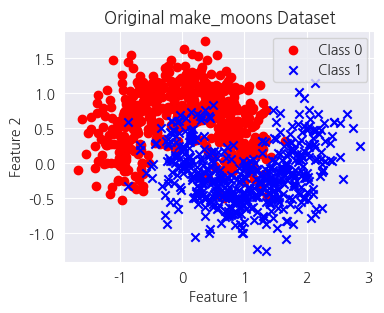

In [18]:
# 단일 디시전 트리 실습
X,y = make_moons(n_samples=1000, noise=0.3, random_state=42)
# 데이터셋 시각화 (어떻게 생겼는지 눈으로 확인)
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')
plt.title('Original make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

0.9166666666666666


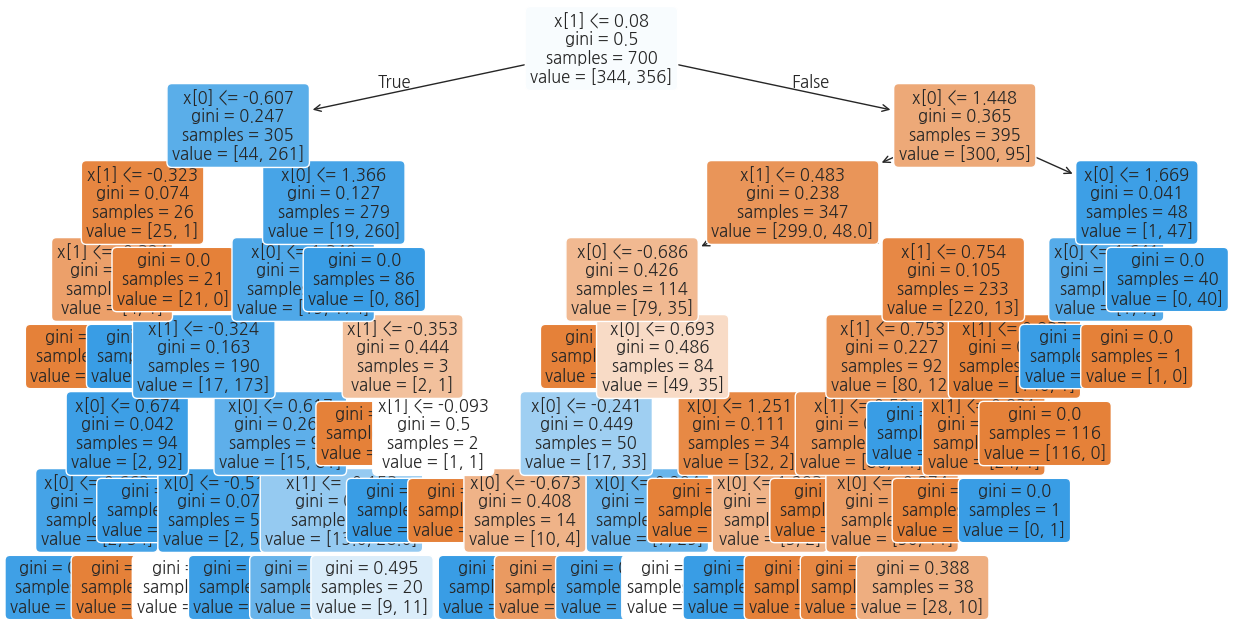

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print(accuracy_dt)
plt.figure(figsize=(15, 8))
plot_tree(dt_clf, fontsize=12, filled=True, rounded=True)
plt.show()

In [20]:
# from sklearn.tree import export_graphviz
# import graphviz
#
# dot_data = export_graphviz(dt_clf,
#                            filled=True,
#                            rounded=True,
#                            feature_names=['Featur1', 'Featur2']
#                            ,class_names=['Class 0', 'Class 1']
#                            )
# graph = graphviz.Source(dot_data)
# graph


In [21]:
# 산점도 시각화할 함수 정의

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # 컬러맵 정의
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # 배경 색
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # 점 색

    # 그리드 영역 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 모델로 예측한 결정 경계
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)  # 결정 경계 색
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

    plt.show()

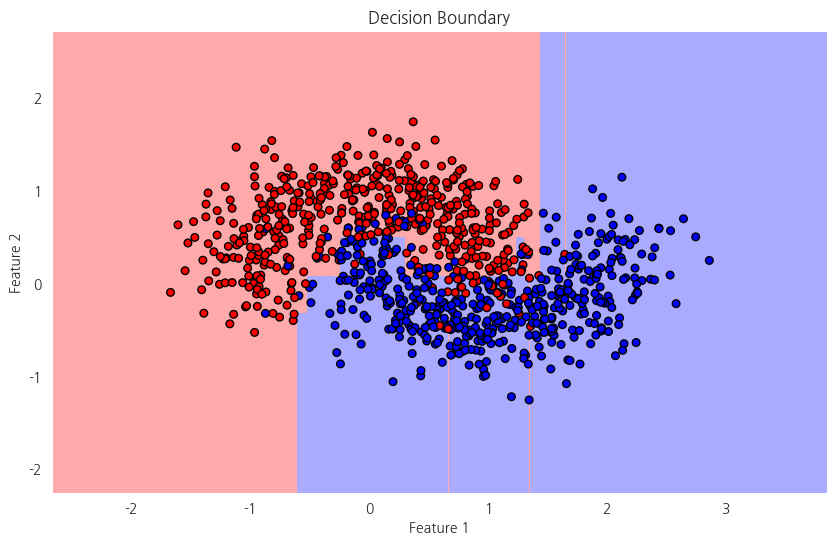

In [22]:
plot_decision_boundary(dt_clf, X, y, "Decision Boundary")

# 랜덤 포레스트 실습

In [23]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7, n_jobs=-1)
# n_estimatros 중요!!! 결정트리 몇개 쓸거냐
# 엔 잡스, 씨피유, 지피유 다 써서해라. 처리 속도 상승
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_jobs=-1, random_state=42)

In [24]:
y_pred = rf_clf.predict(X_test)

In [25]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)
# 점수는 오히려 낮아보임

0.9133333333333333


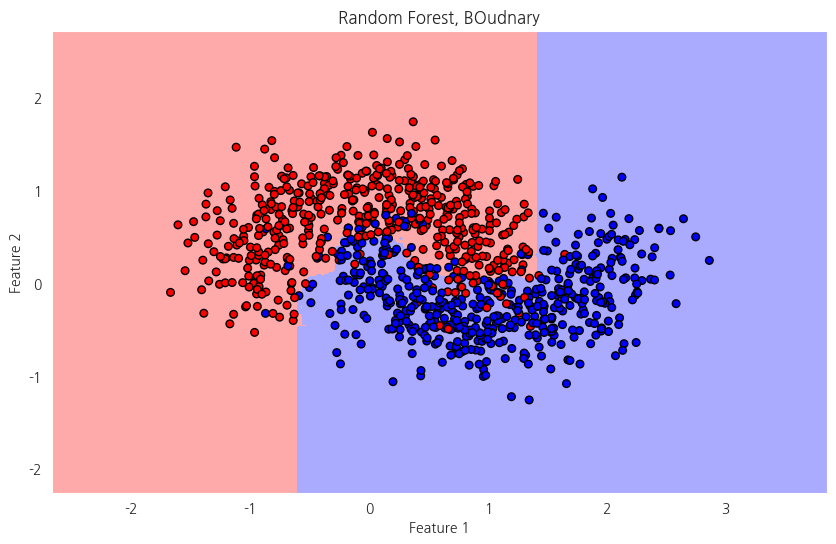

In [26]:
plot_decision_boundary(rf_clf, X, y, "Random Forest, BOudnary")


# AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
base_estimator = DecisionTreeClassifier(max_depth=1) # stump 생성, 아다부스트는 기본으로 들어가야함

In [30]:
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=1000, #약한 학습기를 몇개 가져갈거냐
    learning_rate=1.0, #각 트리의 가중치 조정

)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.92

In [31]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

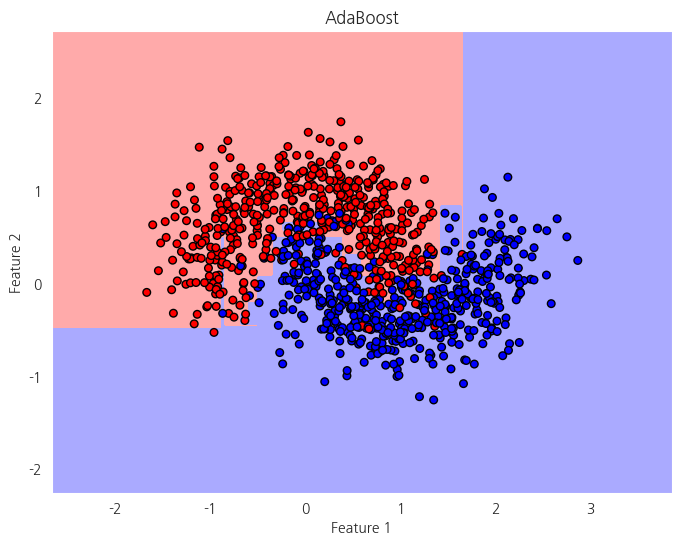

In [32]:
plot_decision_boundary(ada_clf, X, y, "AdaBoost") # 아까한거랑 비교해서 좀더 잘맞음.

# XGBoost example

In [33]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [34]:
data = fetch_california_housing()
X = data.data
y = data.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(0.48565363268161993)

# XGBoost 분류

In [38]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# multi:softmax, 다중 클래스 분류 문제에 사용될거다.
# objective 쓰면 num_class도 같이세트로 써야됨

model = xgb.XGBClassifier(objective = 'multi:softmax',
                          num_class=2,)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [39]:
y_pred = model.predict(X_test)

In [40]:
acc_XGB = accuracy_score(y_test, y_pred)
acc_XGB # 1.0 나오니깐 다 맞춘거임...


1.0

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [42]:
# 시각화를 위한 헬퍼 함수 (이전 실습에서 사용한 것과 동일)
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)

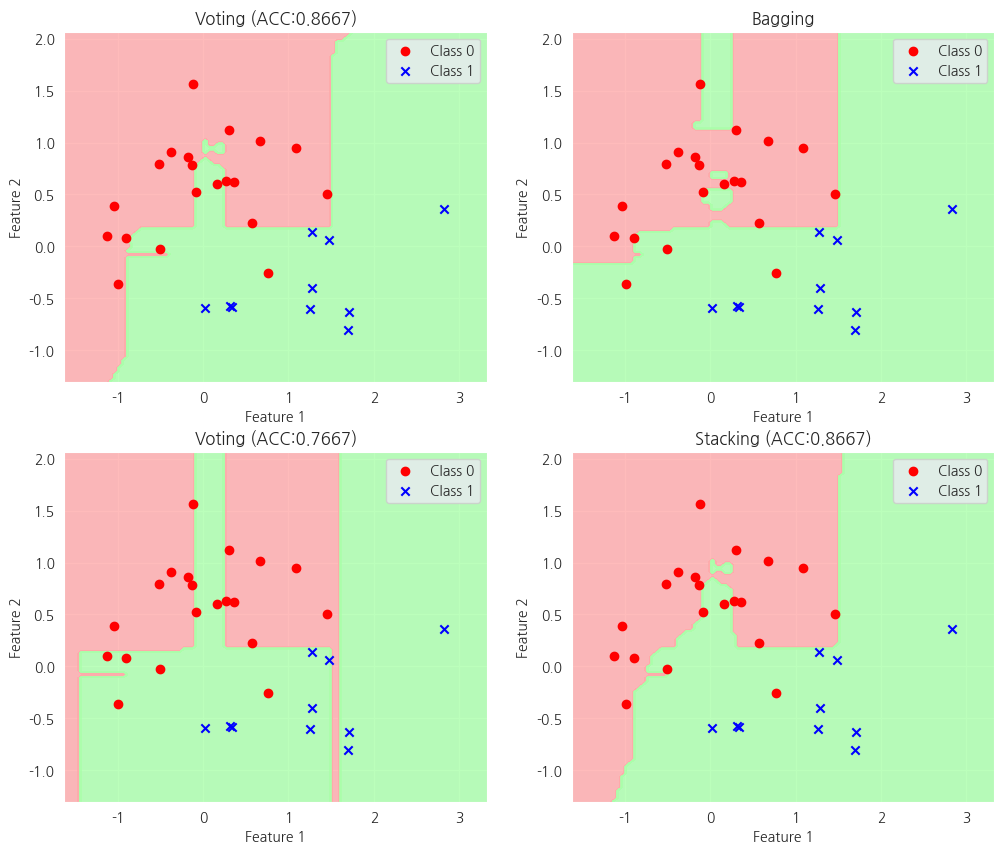

In [43]:
X, y = make_moons(n_samples=100, random_state=42, noise=0.3)
# 모델별 정확도 저장 딕셔너리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
accuracies = {}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
# 1. 보팅 누가 제일 많이 선택했나. 임원 3명이 투표, 2명이 투표, 하드보팅, 소프트보팅

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = KNeighborsClassifier(n_neighbors=5)

# 1-2 소프트보팅
voting_clf = VotingClassifier(estimators=[('lr', clf1),('dt', clf2),('KNN', clf3)],
                              voting='soft',
                              weights=[1, 1, 1])

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
plot_decision_boundary(voting_clf, X_test, y_test, axes[0],
                       f"Voting (ACC:{accuracy_voting:.4f})")
accuracies['Voting'] = accuracy_voting

# bagging
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), #얘가 베이스 모델
                                n_estimators=100, # 베이스모델 몇 개 쓸거냐
                                max_samples=0.7, # 각 트리가 훈련 데이터의 70%를 사용하겠다. 중복허용
                                bootstrap=True,
                                )


bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracies['bagging'] = accuracy_bagging
plot_decision_boundary(bagging_clf, X_test, y_test, axes[1], "Bagging")


#3.    부스팅
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_clf.fit(X_train, y_train)
y_pred_boosting = gb_clf.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
accuracies['boosting'] = accuracy_boosting
plot_decision_boundary(gb_clf, X_test, y_test, axes[2],
                       f"Voting (ACC:{accuracy_boosting:.4f})")

# 4. 스태킹
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier(max_depth=5)),
              ('KNN', KNeighborsClassifier()),]


# 4-2 메타 모델 설정
stacking_clf = StackingClassifier(estimators=estimators,
                                  final_estimator=LogisticRegression(),
                                  cv=5)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
plot_decision_boundary(stacking_clf, X_test, y_test, axes[3],
                       f"Stacking (ACC:{accuracy_stacking:.4f})")

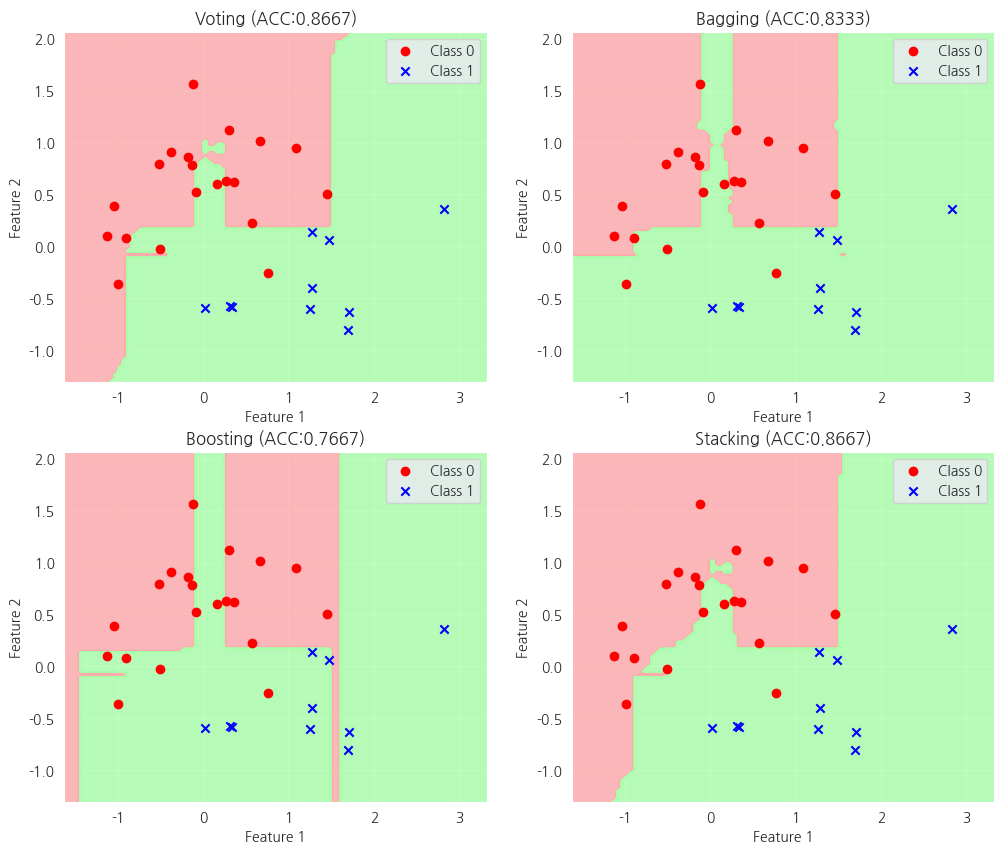

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
accuracies = {}

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

# 1) Voting
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft', weights=[1, 1, 1]
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
accuracies['Voting'] = accuracy_voting
plot_decision_boundary(voting_clf, X_test, y_test, axes[0],
                       f"Voting (ACC:{accuracy_voting:.4f})")

# 2) Bagging
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
    n_estimators=100, max_samples=0.7, bootstrap=True, random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracies['Bagging'] = accuracy_bagging
plot_decision_boundary(bagging_clf, X_test, y_test, axes[1],
                       f"Bagging (ACC:{accuracy_bagging:.4f})")

# 3) Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                    max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_boosting = gb_clf.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
accuracies['Boosting'] = accuracy_boosting
plot_decision_boundary(gb_clf, X_test, y_test, axes[2],
                       f"Boosting (ACC:{accuracy_boosting:.4f})")

# 4) Stacking
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
              ('knn', KNeighborsClassifier(n_neighbors=5))]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5, n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracies['Stacking'] = accuracy_stacking
plot_decision_boundary(stacking_clf, X_test, y_test, axes[3],
                       f"Stacking (ACC:{accuracy_stacking:.4f})")

In [45]:
for model_name, acc in accuracies.items():
    print(f"Model: {model_name}, Accuracy: {acc:.4f}")

Model: Voting, Accuracy: 0.8667
Model: Bagging, Accuracy: 0.8333
Model: Boosting, Accuracy: 0.7667
Model: Stacking, Accuracy: 0.8667
